# Credit Card Fraud Detection - Basics

## **1. About the problem**

In today's digital economy, credit card transactions are at the heart of everyday commerce—from online purchases to point-of-sale payments. However, this convenience comes with a significant downside: the rising threat of credit card fraud. Cybercriminals continuously evolve their tactics, making traditional rule-based fraud detection systems increasingly inadequate. The financial cost of fraudulent activity is staggering, and the reputation damage and consumer mistrust that follow can be equally devastating.



### 1.1. Fraud detection challenges

Key factors contributing to the complexity of fraud detection include:



*   **Rarity:** Fraudulent transactions are exceptionally uncommon compared to legitimate ones.
*   **Absence of a Unified Fraud Classification System:** There's currently no universally agreed-upon classification for types of credit card fraud. This makes it difficult for researchers and organizations to categorize, compare, and share their findings consistently, complicating both the design and evaluation of fraud detection systems.
*   **Evolving Fraud Tactics:** As detection methods grow more sophisticated, fraudsters continuously adapt their strategies to evade them. This means detection systems must not only be accurate but also flexible and frequently updated.



## **2. About the data**


*   The dataset contains transactions made by credit cards in September 2013 by European cardholders.
*   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
*   The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
*   It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the data doesn't provide the original features and more background information about it.
*   Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.
*   Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
*   The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
*   Feature `Class` is the response variable and it takes value `1` in case of fraud and `0` otherwise.


For more details on the dataset click [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

>   💡 **Note:** Because fraud cases occur infrequently, the dataset is heavily skewed toward legitimate transactions. This class imbalance hampers the ability of typical machine learning models to effectively detect fraudulent activity.

## 2.1. Fetch the data from Kaggle

### 2.1.1. Import libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

/workspaces/mlops-project/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2.1.2. Download the dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

df = pd.read_csv(path+"/creditcard.csv")

100%|██████████| 66.0M/66.0M [00:02<00:00, 24.5MB/s]

Extracting files...


## **3. Preliminary data inspection**

In [3]:
# Dataframe shap
df.shape

(284807, 31)

In [4]:
# Print the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3.1. Assess data types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values in the dataset.

### 3.2. Statistical overview of the data

#### 3.2.1 Summary statistics

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 3.2.2. Feature distributions

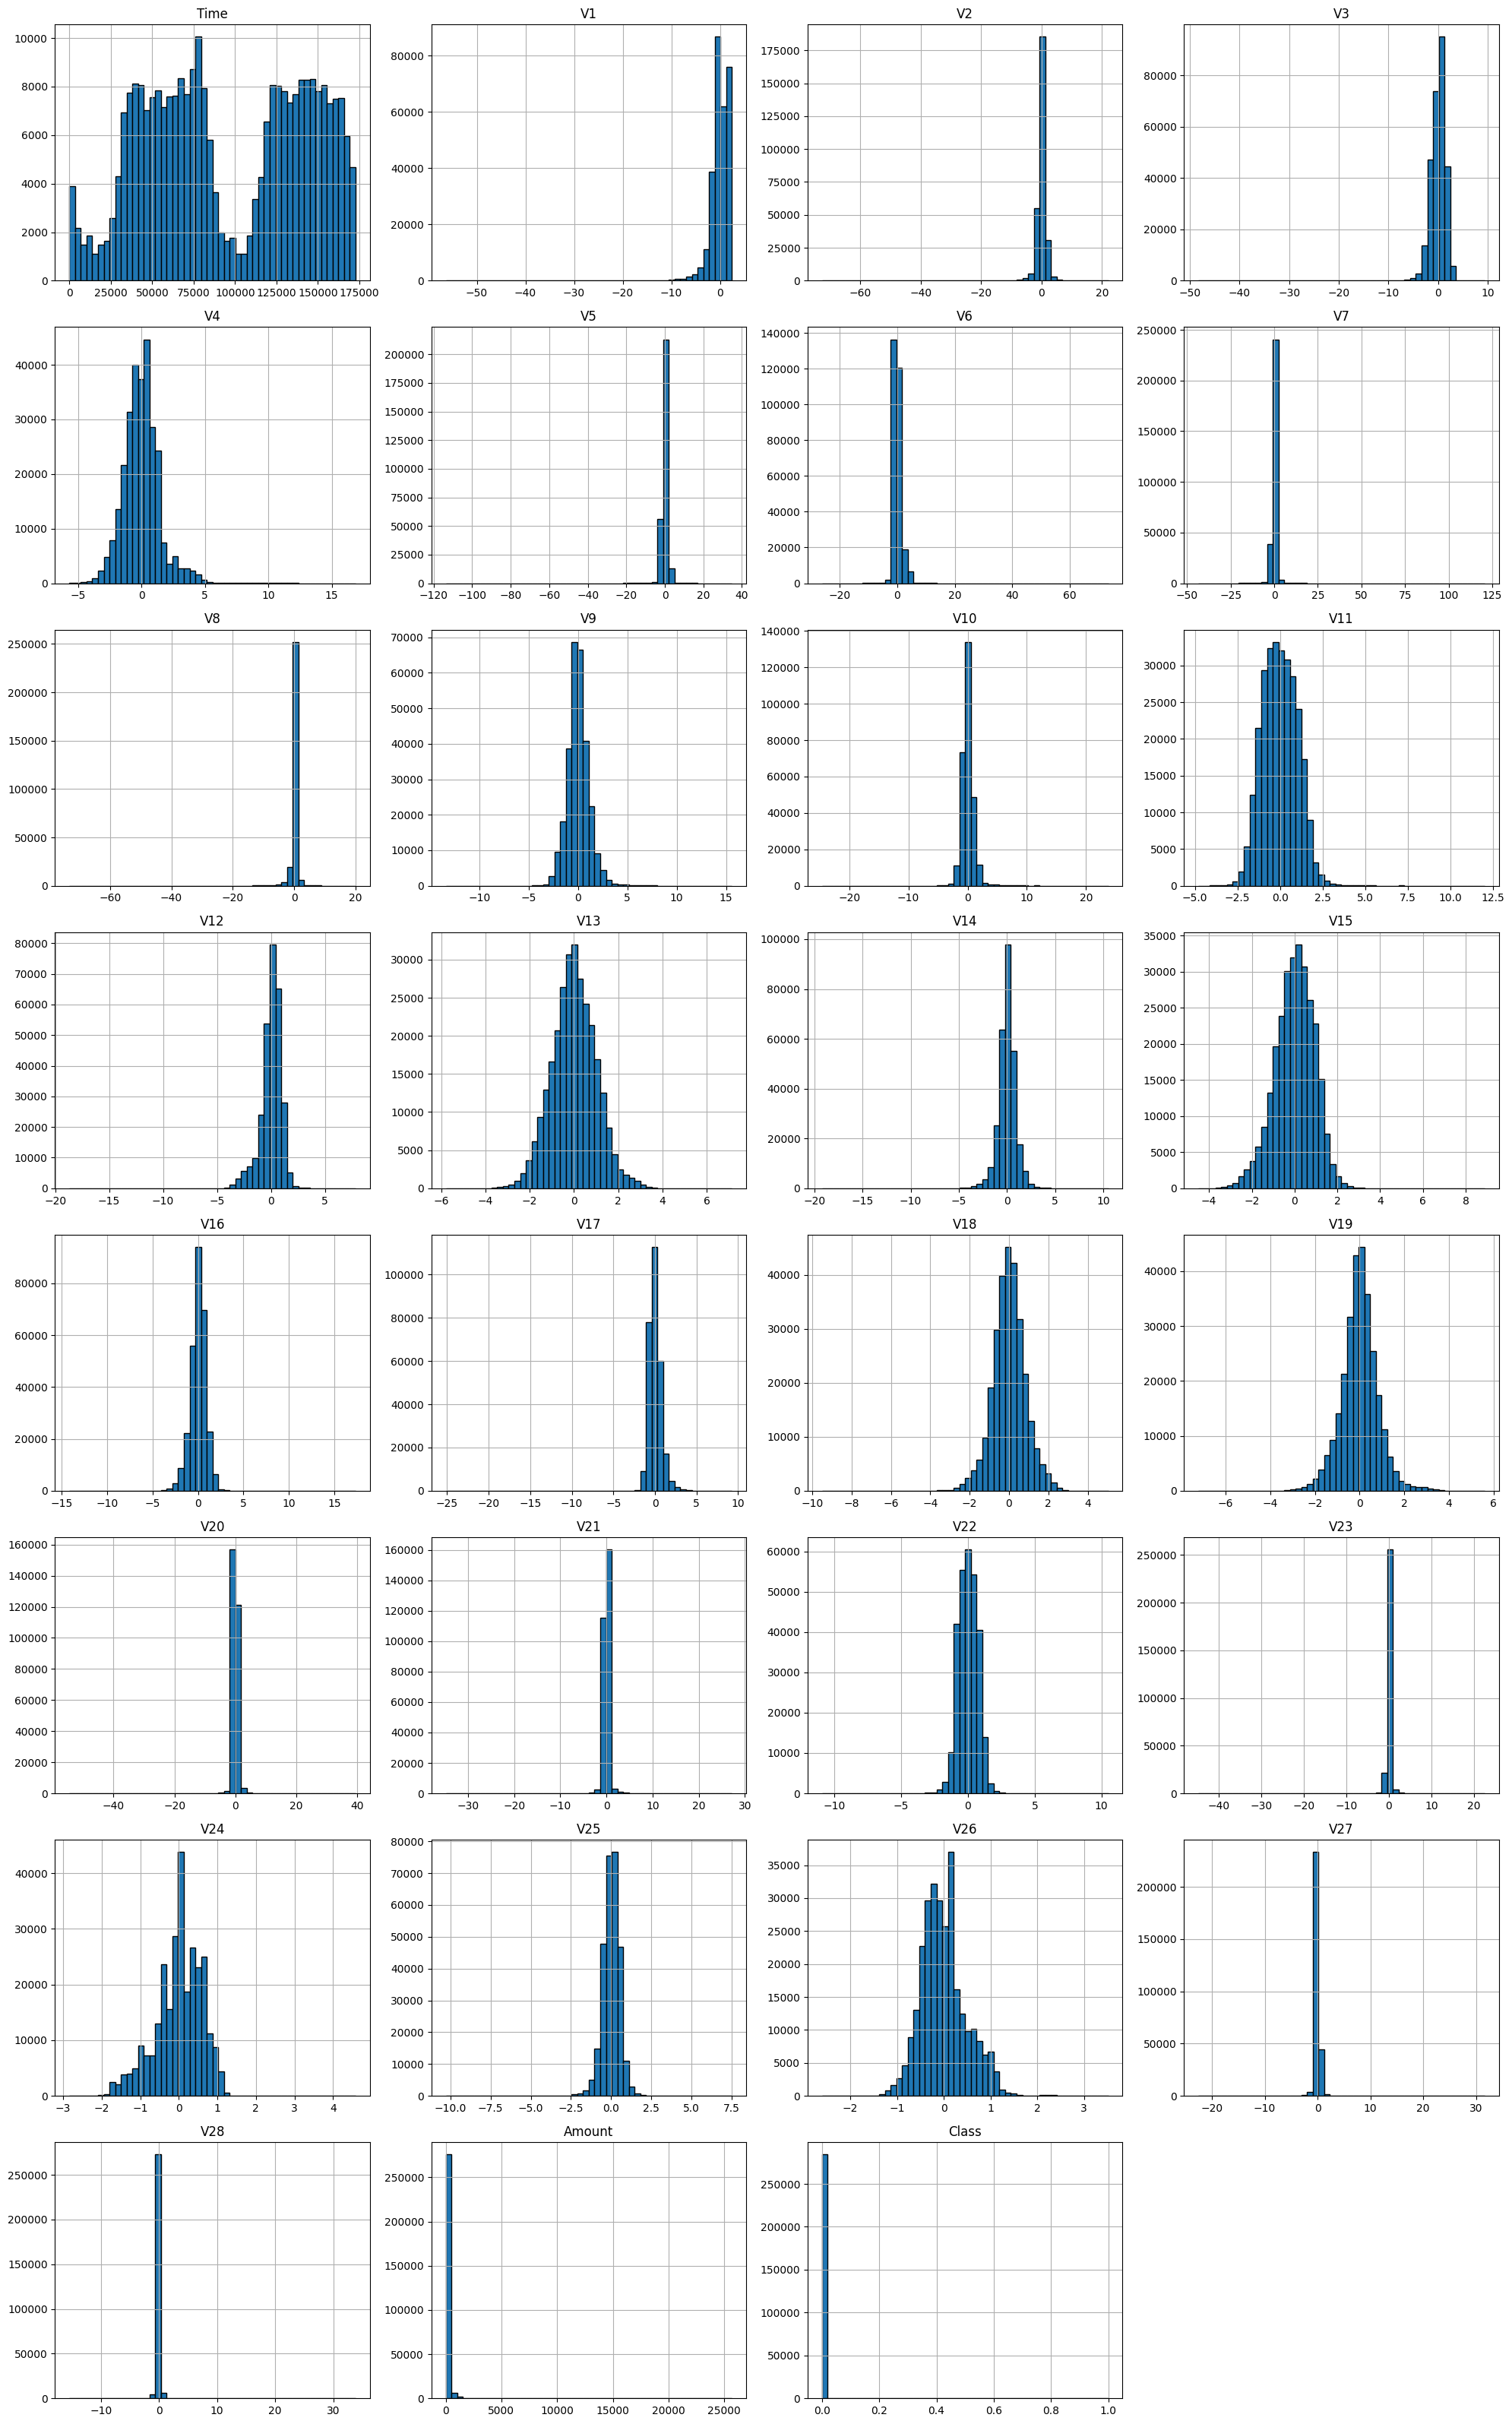

In [7]:
# Set the number of columns per row in the plot grid
cols = 4
rows = (df.shape[1] + cols - 1) // cols  # Ensures enough rows for all columns

# Set up the plot
plt.figure(figsize=(20, rows * 4))

for i, column in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    df[column].hist(bins=50, edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()

### 3.3. Fraud to non-fraud ratio

In [8]:
# Count and ratio of each class (Fraud vs Non-Fraud)
counts = df['Class'].value_counts()
ratios = counts / len(df)

summary = pd.DataFrame({
    'Count': counts,
    'Ratio': ratios
})

summary.rename(index={0: 'Non-Fraud (0)', 1: 'Fraud (1)'})

,Count,Ratio
Class,,
Non-Fraud (0),284315,0.998273
Fraud (1),492,0.001727


In [9]:
print("The natural accuracy (if wew were to predict anything as non-fraud) is: ",np.round(summary.iloc[0,1]*100,4))

The natural accuracy (if wew were to predict anything as non-fraud) is:  99.8273


#### 3.3.1. Visualize the fraud to non-fraud ratio

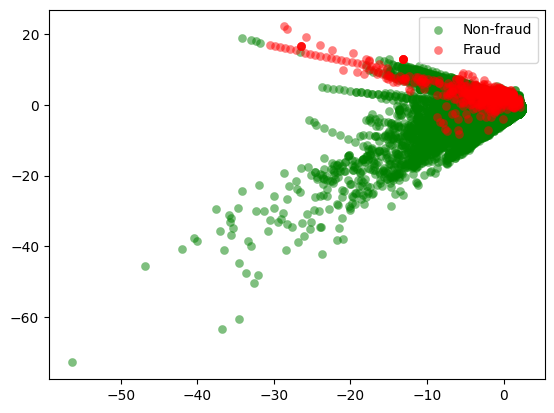

In [10]:
# Extract columns 1 to 28 (assuming 0-based indexing)
features = df.iloc[:, 1:29].values.astype(float)
# Extract the 29th column (index 28) for labels
label = df.iloc[:, 30].values.astype(float)

# Plot
plt.scatter(features[label == 0, 0], features[label == 0, 1], label="Non-fraud", alpha=0.5, linewidth=0.15, c='g')
plt.scatter(features[label == 1, 0], features[label == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

## **4. Data preprocessing**

### 4.1. Scaling

Since the `Amount` feature have values ranging from `0` to `25691.16` while other features are scaled and have almost similar ranges, then it is better to scale the `Amount` feature as well.

The `Amount` feature exhibits a skewed distribution—a typical characteristic in credit card datasets, where numerous small transactions are accompanied by a limited number of high-value ones. Consequently, `RobustScaler` is employed to normalize this feature, as it is more resilient to outliers compared to `StandardScaler`, which assumes an approximately normal distribution.


Also, since the `Time` feature is the seconds elapsed between each transaction and the first transaction in the dataset, it is not very informative and we will test our models with and without this feature. Hence, we need to scale it similarly to the `Amount` feature.

In [11]:
# Apply RobustScaler to scale Amount and Time columns
columns_to_scale = ['Time', 'Amount']

df_scaled = df.copy()
scaler = RobustScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

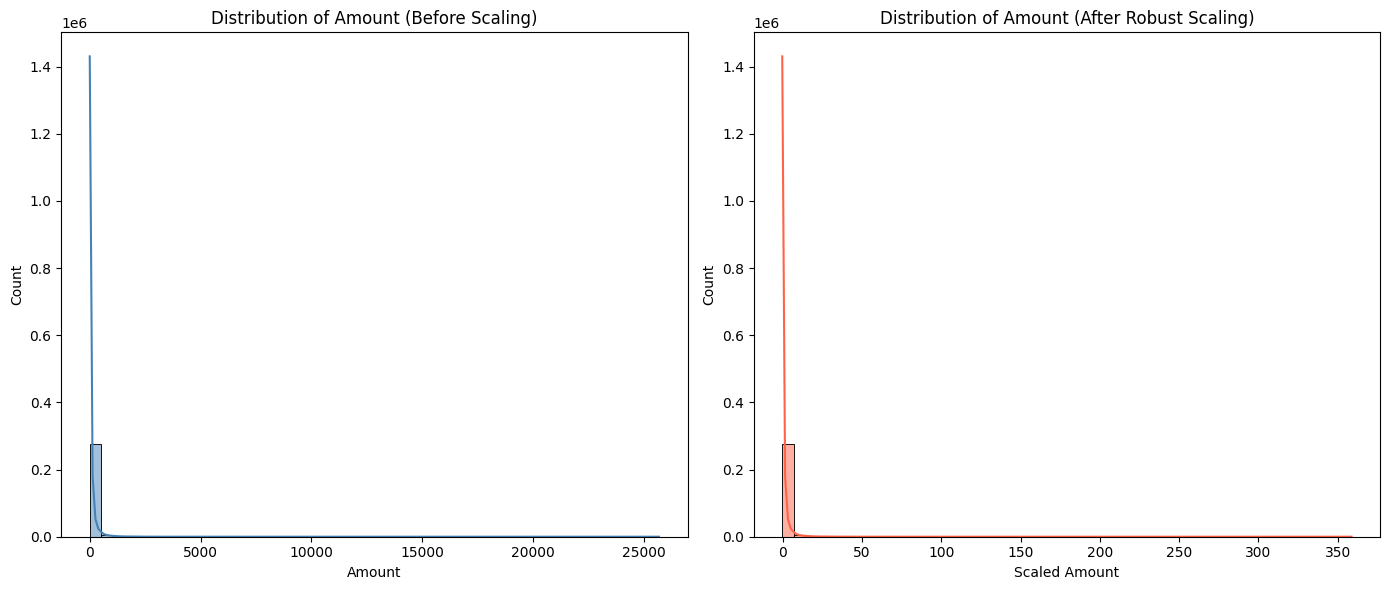

In [12]:
# Plot Amount feature distribution
plt.figure(figsize=(14, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Amount (Before Scaling)')
plt.xlabel('Amount')

# Scaled Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['Amount'], bins=50, kde=True, color='tomato')
plt.title('Distribution of Amount (After Robust Scaling)')
plt.xlabel('Scaled Amount')

plt.tight_layout()
plt.show()


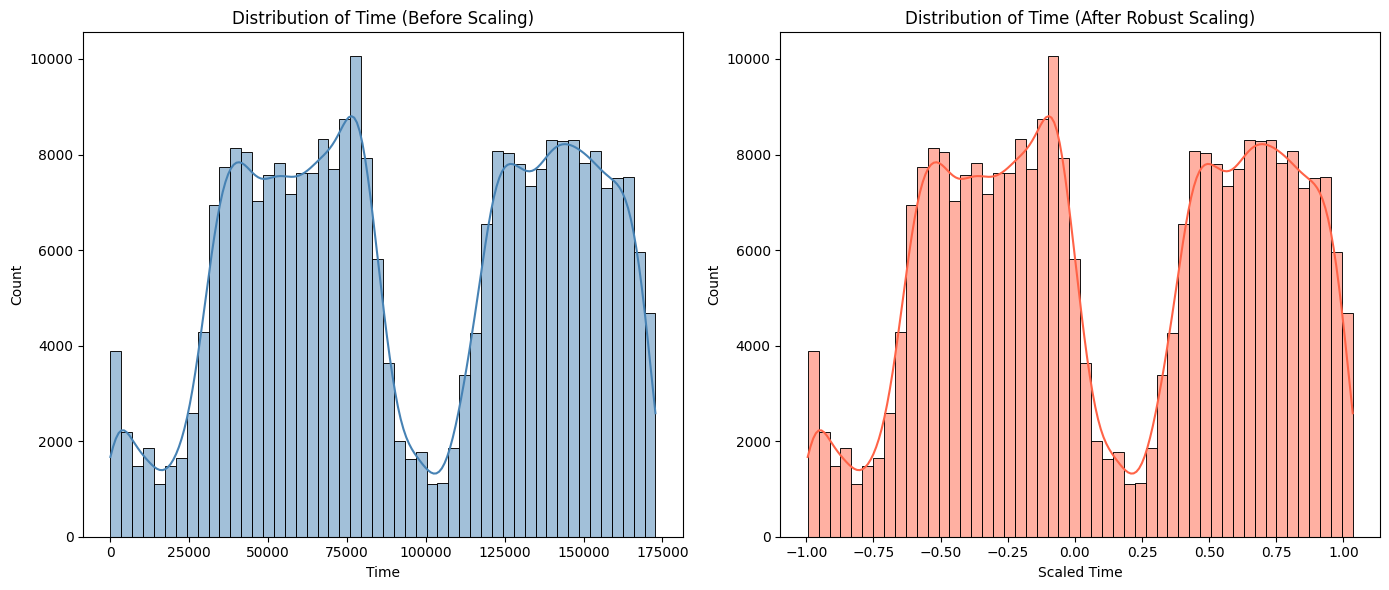

In [13]:
# Plot Time feature distribution
plt.figure(figsize=(14, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Time (Before Scaling)')
plt.xlabel('Time')

# Scaled Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['Time'], bins=50, kde=True, color='tomato')
plt.title('Distribution of Time (After Robust Scaling)')
plt.xlabel('Scaled Time')

plt.tight_layout()
plt.show()

In [14]:
processed_data = df_scaled.copy()

In [15]:
processed_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### 4.2. Resampling

To improve how machine learning models identify rare fraud cases, it's important to address the issue of **class imbalance** in the dataset. Since fraudulent transactions are significantly outnumbered by legitimate ones, rebalancing techniques can help models learn more effectively. Common methods include:

1. **Undersampling:**
This technique reduces the number of non-fraud (majority) observations by randomly selecting a subset to match the volume of fraud cases. While it helps balance the classes, the tradeoff is the loss of potentially valuable information from discarded data.

2. **Oversampling:**
In this approach, fraud (minority) cases are duplicated randomly to boost their presence in the dataset. Although it increases balance, it leads to training the model on a lot of duplicates.

3. **SMOTE (Synthetic Minority Oversampling Technique):**
Rather than duplicating existing fraud cases, SMOTE generates new, synthetic examples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations. However, this only works well if fraud cases are quite similar to each other. If fraud is spread out and not very distinct, using nearest neighbors to create more fraud cases introduces a bit of noise in the data, as the nearest neighbors might not necessarily be fraud cases.


>   ⚠️ **Note:** To ensure valid model evaluation, resampling techniques should be applied exclusively to the training set. The objective is to enhance the model’s learning by providing a balanced representation of classes, not to generate predictions on synthetic or duplicated instances. It is critical that the test set remains untouched—free from synthetic samples or duplicates—so that model performance is assessed only on authentic, unseen data. Accordingly, the dataset should be partitioned into training and testing subsets prior to any resampling, with resampling confined to the training portion.

## **5. Model selection and validation**

### 5.1. Model training and testing

In [16]:
# Extract features columns
features = processed_data.drop(columns=['Class'])
# Extract label/target column
label = processed_data['Class']

#### 5.1.1. Train Test Split

Create train, validation and test splits.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=42
)

# Further split training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

#### 5.1.2. Applying SMOTE to the train data

In [18]:
# Define resampling method and split into train and test
method = SMOTE(random_state=42)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

##### Fraud to non-fraud ratio comparison

In [19]:
# Original distribution
original_counts = pd.DataFrame(y_train).value_counts()
original_ratios = original_counts / len(y_train)

# Assuming X_resampled and y_resampled are your resampled features and labels
resampled_counts = pd.DataFrame(y_resampled).value_counts()
resampled_ratios = resampled_counts / len(y_resampled)

# Combine into one DataFrame
summary = pd.DataFrame({
    'Original Count': original_counts,
    'Original Ratio': original_ratios,
    'Resampled Count': resampled_counts,
    'Resampled Ratio': resampled_ratios
})

# Optional: Rename classes for readability
summary.index = ['Non-Fraud (0)', 'Fraud (1)']

# Display
summary

,Original Count,Original Ratio,Resampled Count,Resampled Ratio
Non-Fraud (0),181946,0.99819,181946,0.5
Fraud (1),330,0.00181,181946,0.5


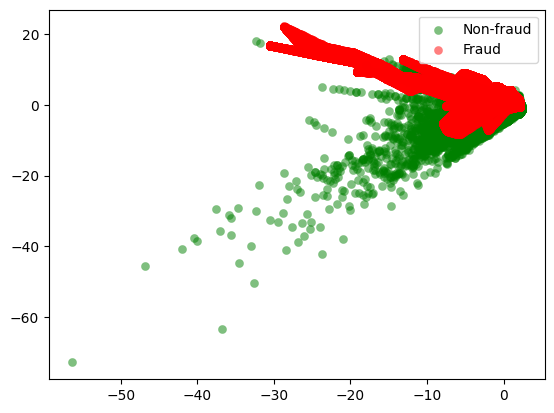

In [20]:
# Plot
plt.scatter(X_resampled[y_resampled == 0].iloc[:, 1], X_resampled[y_resampled == 0].iloc[:, 2], label="Non-fraud", alpha=0.5, linewidth=0.15, c='g')
plt.scatter(X_resampled[y_resampled == 1].iloc[:, 1], X_resampled[y_resampled == 1].iloc[:, 2], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

### 5.2. Classification models implementation

#### 5.2.1. Logistic Regression

Logistic regression is a supervised machine learning algorithm used for binary classification. It estimates the probability that a given input belongs to a particular class (e.g., fraud vs. not fraud) using a sigmoid function to map outputs between 0 and 1.


>   💡 **Note:** The Logistic Regression model is simple and fast, thus, we use it as a performance baseline.

##### Before resampling

In [21]:
# Instantiate the logistic regression model
lr = LogisticRegression()

# Fit training data to the model
lr.fit(X_train, y_train)

# Obtain prediction
y_pred = lr.predict(X_valid)

In [22]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.84      0.58      0.69        64

    accuracy                           1.00     45569
   macro avg       0.92      0.79      0.84     45569
weighted avg       1.00      1.00      1.00     45569



In [23]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.8409
Recall: 0.5781
F1-Score: 0.6852


>   📌 **Note:**

In [24]:
# Build dynamic markdown string
Markdown(f"""
> 📌 **Note:**

- **Accuracy** means that out of all predictions, `{accuracy*100:.2f}%` were correct. However, in imbalanced datasets, accuracy can be misleading—i.e., a model that predicts everything as "not fraud" will still have high accuracy.
- **Precision** means that when the model predicted "fraud", it was correct `{precision*100:.2f}%` of the time. High precision means very few false alarms (false positives).
- **Recall** means that out of all actual fraud cases, the model detected `{recall*100:.2f}%`. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
- **F1-Score** is a balance between precision and recall. `{f1*100:.2f}%` is strong and shows the model handles both catching fraud and avoiding false alarms well.
""")


> 📌 **Note:**

- **Accuracy** means that out of all predictions, `99.93%` were correct. However, in imbalanced datasets, accuracy can be misleading—i.e., a model that predicts everything as "not fraud" will still have high accuracy.
- **Precision** means that when the model predicted "fraud", it was correct `84.09%` of the time. High precision means very few false alarms (false positives).
- **Recall** means that out of all actual fraud cases, the model detected `57.81%`. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
- **F1-Score** is a balance between precision and recall. `68.52%` is strong and shows the model handles both catching fraud and avoiding false alarms well.


In [25]:
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[45498     7]
 [   27    37]]


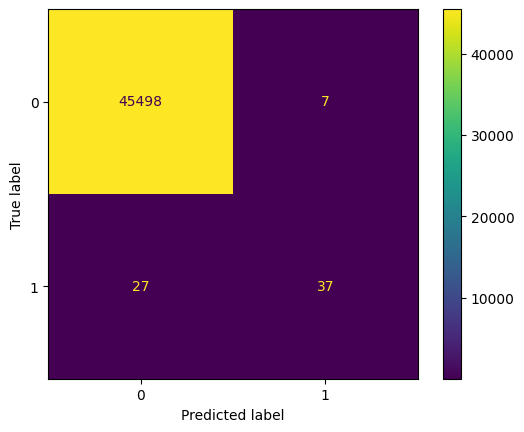

In [26]:
ConfusionMatrixDisplay.from_estimator(lr, X_valid, y_valid)

In [27]:
Markdown(f"""
> 📌 **Note:**  
A credit card company might want to catch as much fraud as possible and reduce false negatives, as fraudulent transactions can be incredibly costly—whereas a false alarm just means someone's transaction is blocked.  
Without resampling, we see that the model predicted `{conf_mat[1,0]}` transactions as non-fraudulent when in fact they were fraudulent.
""")



> 📌 **Note:**  
A credit card company might want to catch as much fraud as possible and reduce false negatives, as fraudulent transactions can be incredibly costly—whereas a false alarm just means someone's transaction is blocked.  
Without resampling, we see that the model predicted `27` transactions as non-fraudulent when in fact they were fraudulent.


##### After resampling

In [28]:
# Instantiate the logistic regression model
lr_resampled = LogisticRegression()

# Fit training data to the model
lr_resampled.fit(X_resampled, y_resampled)

# Obtain prediction
y_pred = lr_resampled.predict(X_valid)

In [29]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45505
           1       0.05      0.92      0.09        64

    accuracy                           0.97     45569
   macro avg       0.52      0.95      0.54     45569
weighted avg       1.00      0.97      0.99     45569



In [30]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.0472
Recall: 0.9219
F1-Score: 0.0897


In [31]:
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[44313  1192]
 [    5    59]]


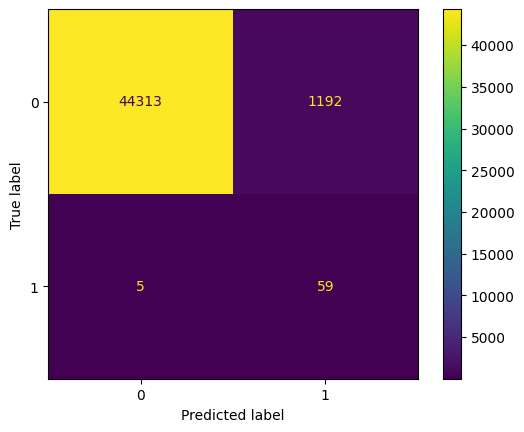

In [32]:
ConfusionMatrixDisplay.from_estimator(lr_resampled, X_valid, y_valid)

In [33]:
Markdown(f"""
> **Note:**  
After resampling, the recall increased to {recall*100:.2f}%, indicating a significant improvement in the model’s ability to detect fraudulent transactions. However, this improvement came at a cost—specifically, a substantial rise in false positives, which led to a sharp decline in precision to just {precision*100:.2f}%.
""")



> **Note:**  
After resampling, the recall increased to 92.19%, indicating a significant improvement in the model’s ability to detect fraudulent transactions. However, this improvement came at a cost—specifically, a substantial rise in false positives, which led to a sharp decline in precision to just 4.72%.


#### 5.2.2. Random Forest

Random Forest is an ensemble learning algorithm that builds a large number of decision trees during training and outputs the majority class for classification.


>   💡 **Note:** Random Forest classifiers enhance accuracy and are robust against overfitting. However, training them can be computationally intensive on large datasets. With default hyperparameters, the following training processes too approximately `4` minutes both before and after resampling, though this depends on the computer processing power.

##### Before resampling

In [34]:
# Instanitate the random forest classification model
rf = RandomForestClassifier(random_state=42)

# Fit training data to the model
rf.fit(X_train, y_train)

# Obtain prediction
y_pred = rf.predict(X_valid)

In [35]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.98      0.77      0.86        64

    accuracy                           1.00     45569
   macro avg       0.99      0.88      0.93     45569
weighted avg       1.00      1.00      1.00     45569



In [36]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9800
Recall: 0.7656
F1-Score: 0.8596


In [37]:
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[45504     1]
 [   15    49]]


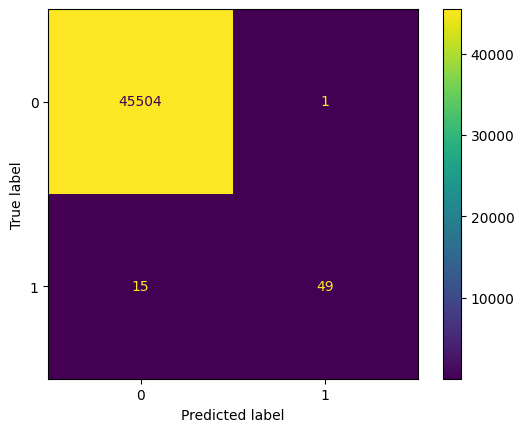

In [38]:
ConfusionMatrixDisplay.from_estimator(rf, X_valid, y_valid)

Applying the Random Forest Classifier (RFC) to the data before resampling yields notable improvements over the Logistic Regression (LR) model. The RFC demonstrates superior performance in handling both false negatives and false positives, resulting in higher recall and precision.

##### After resampling

In [39]:
# Instanitate the random forest classification model
rf_resampled = RandomForestClassifier(random_state=42)

# Fit training data to the model
rf_resampled.fit(X_resampled, y_resampled)

# Obtain prediction
y_pred = rf_resampled.predict(X_valid)

In [40]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.87      0.83      0.85        64

    accuracy                           1.00     45569
   macro avg       0.93      0.91      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [41]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.8689
Recall: 0.8281
F1-Score: 0.8480


In [42]:
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[45497     8]
 [   11    53]]


In [43]:
# Create the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(rf_resampled, X_valid, y_valid)

# Add a title using the figure's Axes object
disp.ax_.set_title("Confusion Matrix for Resampled Random Forest Classifier")

plt.close(disp.figure_)

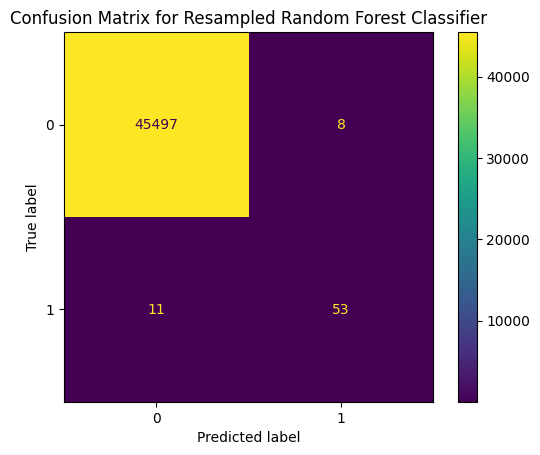

In [44]:
disp.figure_

In [45]:
Markdown(f"""The RFC applied after resampling produces more balanced results. It outperforms both the LR and the non-resampled RFC in detecting false negatives. Additionally, it achieves a significantly higher precision of {precision*100:.2f}% compared to `6.1`% from the resampled LR model, while maintaining a slightly lower recall of {recall*100:.2f}% versus `92.86`%. This trade-off results in a more balanced overall performance.""")

The RFC applied after resampling produces more balanced results. It outperforms both the LR and the non-resampled RFC in detecting false negatives. Additionally, it achieves a significantly higher precision of 86.89% compared to `6.1`% from the resampled LR model, while maintaining a slightly lower recall of 82.81% versus `92.86`%. This trade-off results in a more balanced overall performance.

The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't.

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

## 6. Conclusion

In [49]:
Markdown(f"""In this experiment, we evaluated the performance of Logistic Regression (LR) and Random Forest Classifier (RFC) models for credit card fraud detection, both before and after applying the SMOTE resampling technique to address class imbalance. The results highlight the limitations of the LR model, particularly in handling imbalanced data, as reflected by its poor precision after resampling despite an improved recall. In contrast, the RFC demonstrated stronger performance overall. Even without resampling, the RFC outperformed the LR model by better managing both false positives and false negatives. Most notably, when combined with SMOTE, the RFC achieved a more balanced trade-off between precision and recall, reaching a precision of `{precision*100:.2f}%` and a reasonable recall of `{recall*100:.2f}%`. This suggests that using Random Forest with SMOTE is an effective approach for detecting fraudulent transactions while maintaining a practical balance between catching fraud and minimizing false alarms.""")

In this experiment, we evaluated the performance of Logistic Regression (LR) and Random Forest Classifier (RFC) models for credit card fraud detection, both before and after applying the SMOTE resampling technique to address class imbalance. The results highlight the limitations of the LR model, particularly in handling imbalanced data, as reflected by its poor precision after resampling despite an improved recall. In contrast, the RFC demonstrated stronger performance overall. Even without resampling, the RFC outperformed the LR model by better managing both false positives and false negatives. Most notably, when combined with SMOTE, the RFC achieved a more balanced trade-off between precision and recall, reaching a precision of `86.89%` and a reasonable recall of `82.81%`. This suggests that using Random Forest with SMOTE is an effective approach for detecting fraudulent transactions while maintaining a practical balance between catching fraud and minimizing false alarms.

### 6.1 Comparison with deployed inference:

As a final check, we compare the behavior of our chosen model (RFC + SMOTE) on a single unseen observation from the test set. This mirrors what happens in the production API, allowing a direct comparison between offline and deployed inference.

In [ ]:
# Select a single observation from the test set
X_testing = X_test.iloc[[0]]

# Predict class probabilities using the trained RFC model
probabilities_array = rf_resampled.predict_proba(X_testing)

# Determine the predicted class and its probability
class_index = int(np.argmax(probabilities_array[0]))
predicted_proba = float(probabilities_array[0][class_index])

# Display results
print({
    "predicted_class": class_index,
    "probability": predicted_proba
})

## References


1.   [Credit Card Fraud detection Dataset - Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
2.   [Reproducible Machine Learning for Credit Card Fraud Detection - Practical Handbook](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Foreword.html)
3.   [Fraud Detection in Python - DataCamp Learn](https://app.datacamp.com/learn/courses/fraud-detection-in-python)
4.   [Credit Card Fraud Detection - Geeks for Geeks](https://www.geeksforgeeks.org/machine-learning/ml-credit-card-fraud-detection/)

